In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
credit = pd.read_csv(r'credit_card.csv')
credit.head(30)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [7]:
print("data null: \n", credit.isnull().sum())
print("data kosong: \n", credit.empty)
print("data nan: \n", credit.isna().sum())

data null: 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong: 
 False
data nan: 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [8]:
print("Nama kolom dalam dataset:\n", credit.columns)
columns_to_drop = ['Customer Key', 'SL_No']
columns_exist = [col for col in columns_to_drop if col in credit.columns]

df_credit = credit.drop(columns_exist, axis=1)
print(df_credit.head())

Nama kolom dalam dataset:
 Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')
   Sl_No  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      1            100000                   2                  1   
1      2             50000                   3                  0   
2      3             50000                   7                  1   
3      4             30000                   5                  1   
4      5            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3  


<Axes: >

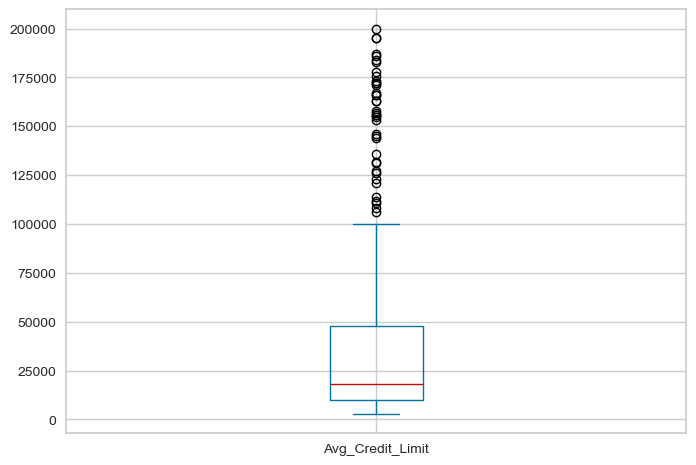

In [9]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


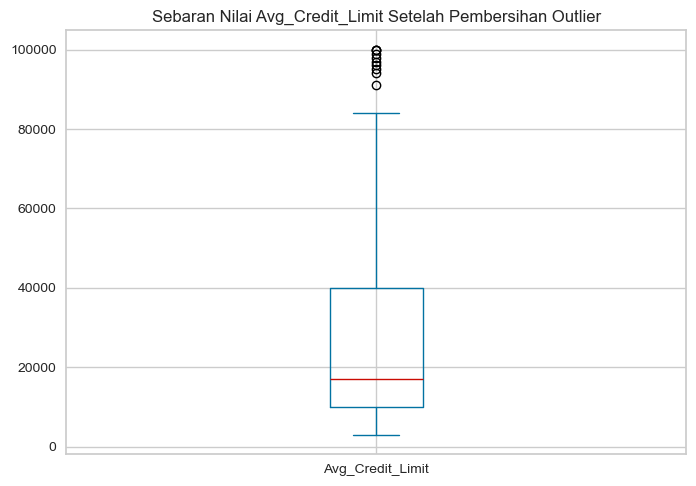

In [12]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        Q1 = data_frame[kolom_outlier].quantile(0.25)
        Q3 = data_frame[kolom_outlier].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data_bersih = data_frame[(data_frame[kolom_outlier] >= lower_bound) & 
                                 (data_frame[kolom_outlier] <= upper_bound)]
        return data_bersih
    else:
        print(f"Kolom {kolom_outlier} bukan tipe data numerik.")
        return data_frame

credit_card = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", credit_card.shape[0])

credit_card['Avg_Credit_Limit'].plot(kind='box')
plt.title("Sebaran Nilai Avg_Credit_Limit Setelah Pembersihan Outlier")
plt.show()

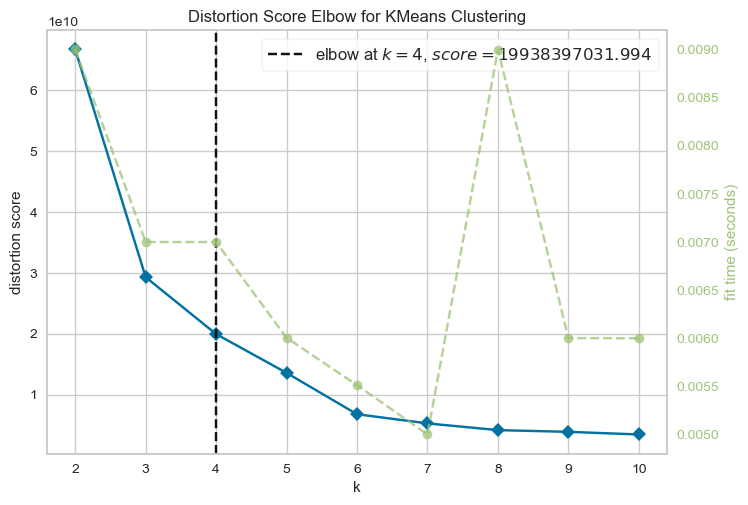

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kMeansC = KMeans(random_state=95)

vis = KElbowVisualizer(kMeansC, k=(2, 11))

 
vis.fit(credit_card)
vis.show()

Silhouette Score K-Means for 2 clusters: 0.7273760735067768
Silhouette Score K-Means for 3 clusters: 0.705490296450827
Silhouette Score K-Means for 4 clusters: 0.6768027781510223
Silhouette Score K-Means for 5 clusters: 0.5977227401869224
Silhouette Score K-Means for 6 clusters: 0.6257676393181738
Silhouette Score K-Means for 7 clusters: 0.6175014153478271
Silhouette Score K-Means for 8 clusters: 0.5780925268835858
Silhouette Score K-Means for 9 clusters: 0.5759993363306009
Silhouette Score K-Means for 10 clusters: 0.5707502251653219


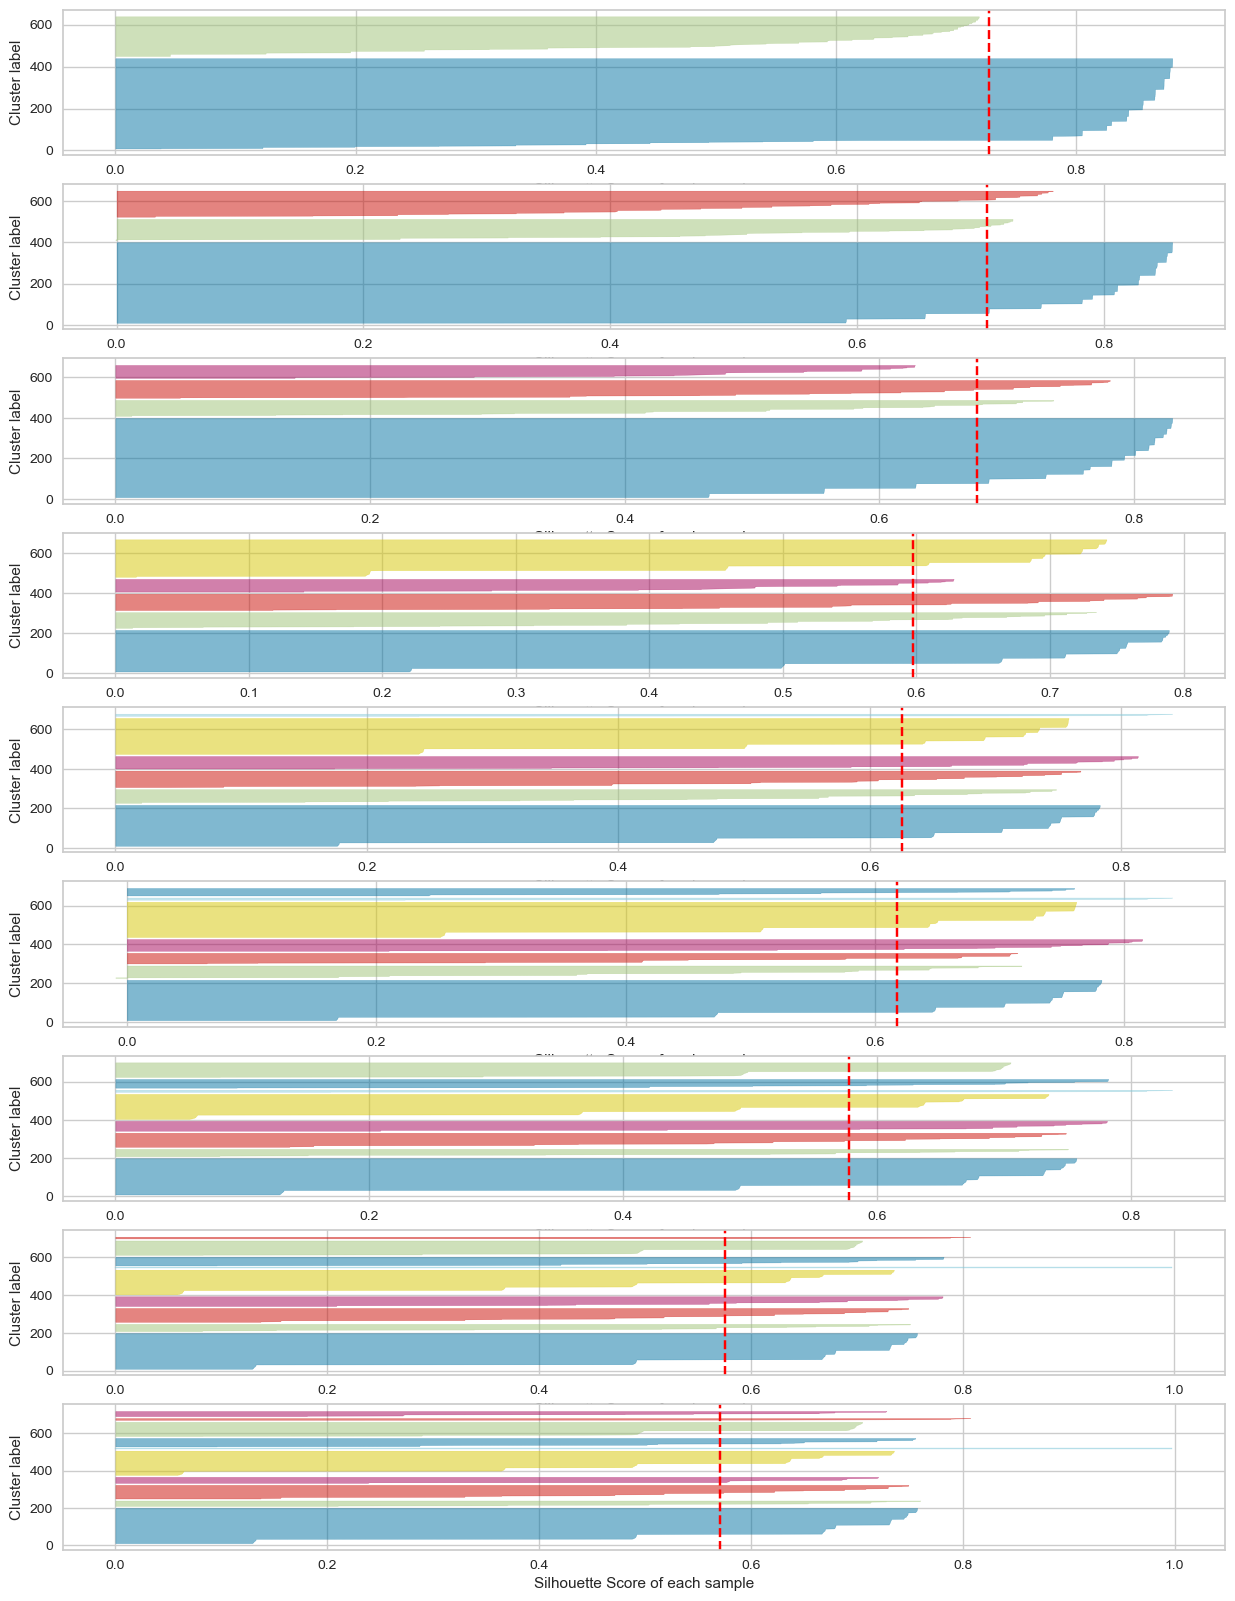

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))
for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=95) 
    
    KM_clusters = kMeansC.fit_predict(credit_card)
    
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(credit_card, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(credit_card)
    
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")

plt.show()

In [16]:
credit_card.columns

Index(['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

Index(['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')


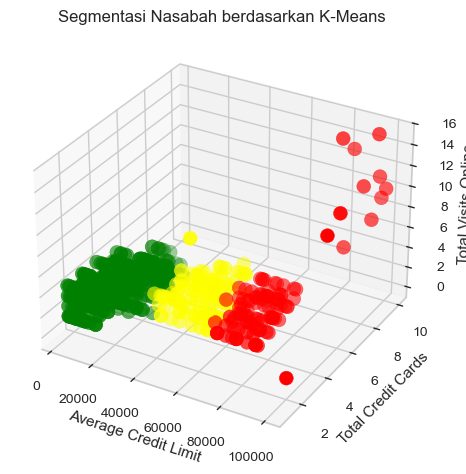

Silhouette Score K-Means: 0.705


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(credit_card.columns)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=95)

K_clusters = kmeans.fit_predict(credit_card)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'green', 1: 'red', 2: 'yellow'}

ax.scatter(credit_card['Avg_Credit_Limit'], 
           credit_card['Total_Credit_Cards'],  
           credit_card['Total_visits_online'],  
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_card, K_clusters))

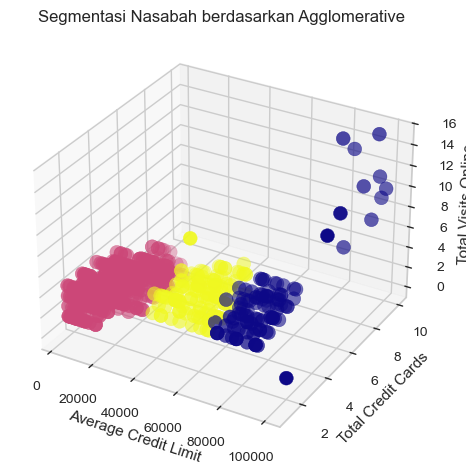

Silhouette Score Agglomerative: 0.705


In [18]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_card)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_card['Avg_Credit_Limit'], credit_card['Total_Credit_Cards'], credit_card['Total_visits_online'], 
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score Agglomerative: %0.3f" % silhouette_score(credit_card, AGG_clusters))

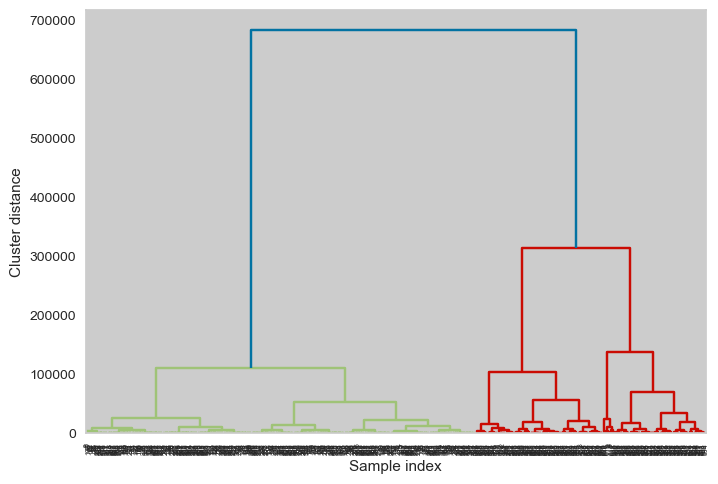

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_array = linkage(credit_card[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online']], method='ward')

dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

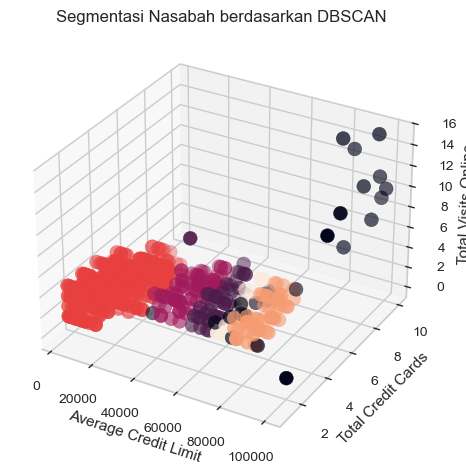

Silhouette Score DBSCAN: 0.657


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(credit_card[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online']])

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_card['Avg_Credit_Limit'], credit_card['Total_Credit_Cards'], credit_card['Total_visits_online'], 
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score DBSCAN: %0.3f" % silhouette_score(credit_card[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online']], DBSC_clusters))

In [21]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump(kmeans, r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump(AGG, r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump(DBSC, r)

print("Model berhasil disimpan")

Model berhasil disimpan
